In [71]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, make_scorer

In [72]:
df = pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [73]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [75]:
d_tc = DecisionTreeClassifier()
d_tc = d_tc.fit(X_train,y_train)
y_pred = d_tc.predict(X_test)
y_train_pred=dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.957286432160804


In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801


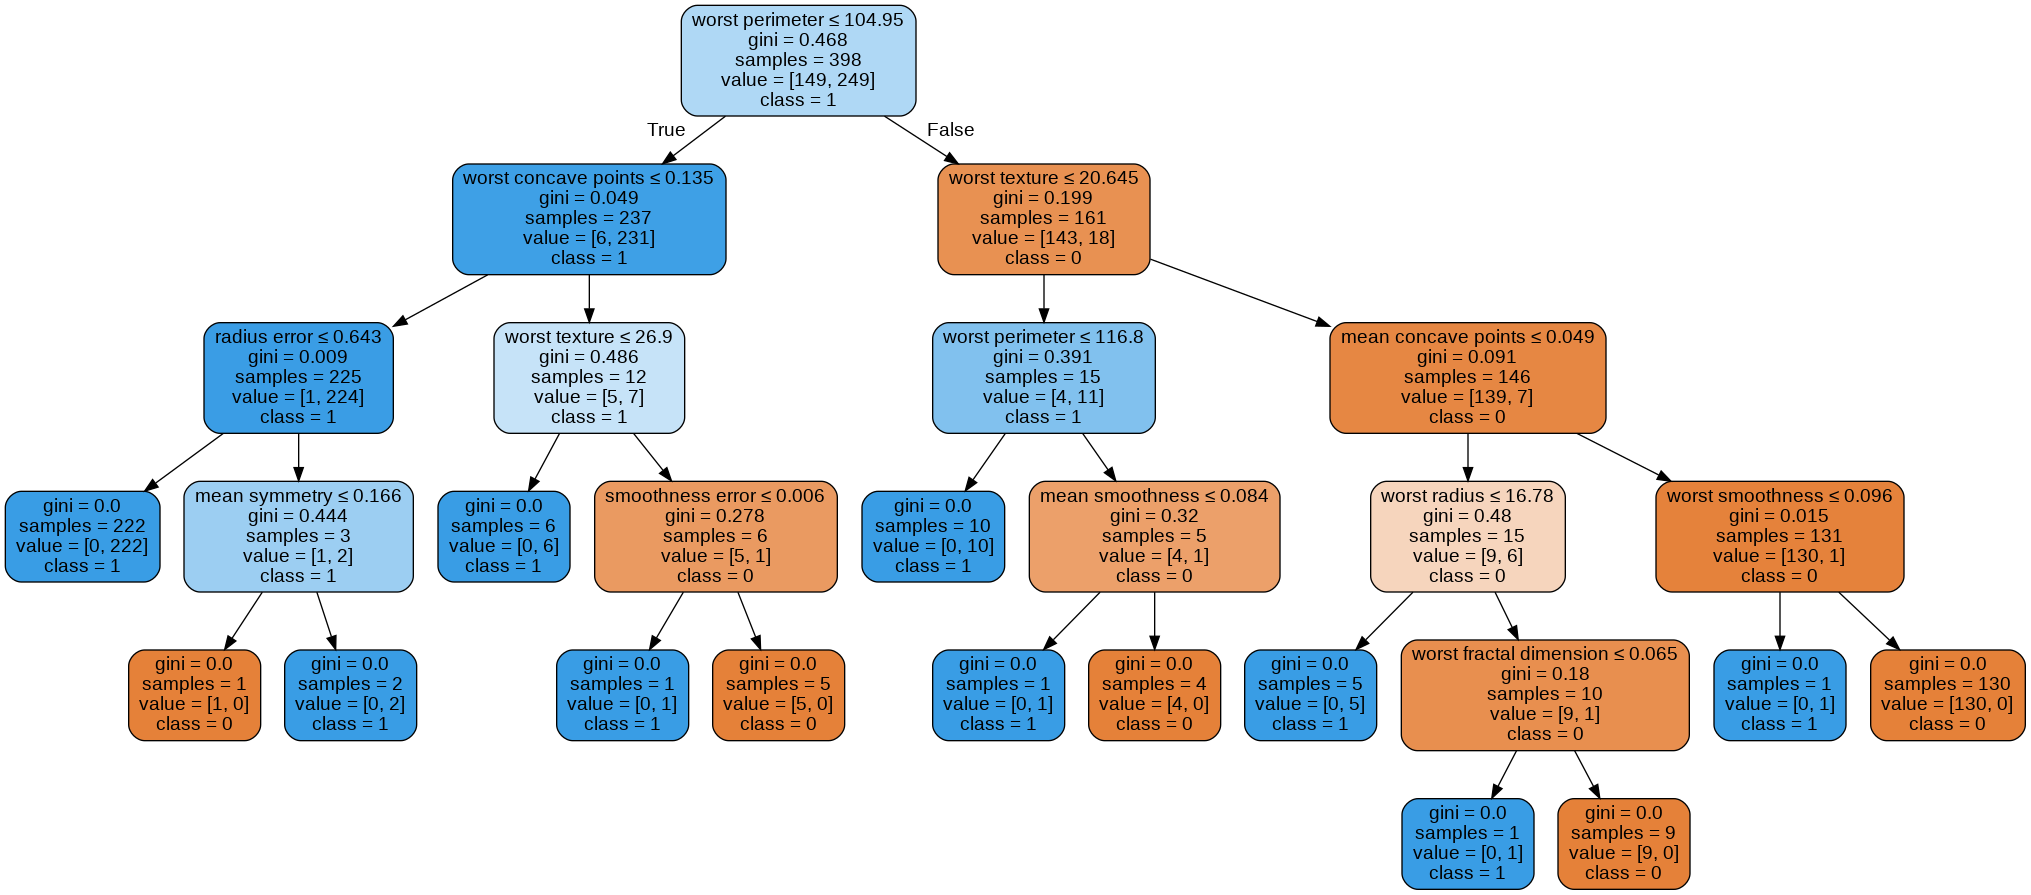

In [77]:
dot_data = StringIO()
export_graphviz(d_tc,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer.png')
Image(graph.create_png())

In [78]:
h={"criterion":["gini","entropy"],"max_depth":[10, 20, 50, 100],"min_samples_leaf":[10, 20, 50]}
d_tc = GridSearchCV(DecisionTreeClassifier(),h)
d_tc = d_tc.fit(X_train,y_train)
y_pred = d_tc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8654970760233918


In [79]:
y_train_pred = dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.957286432160804


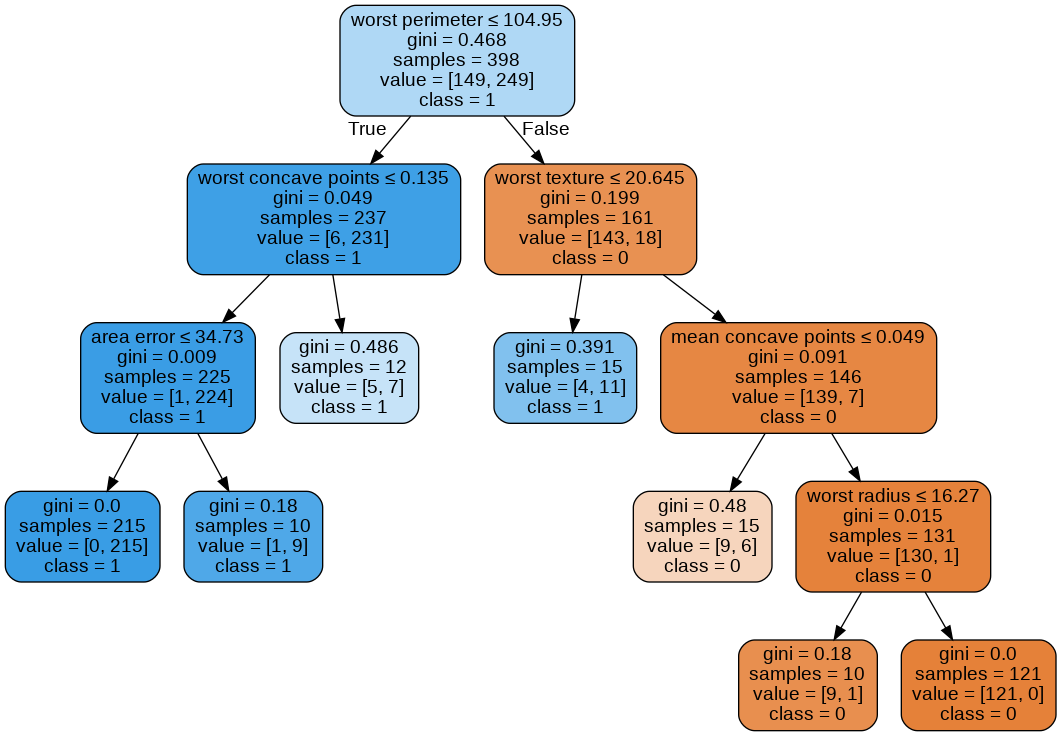

In [80]:
dot_data = StringIO()
export_graphviz(dtc.best_estimator_,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer1.png')
Image(graph.create_png())

Random Forest Classifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 999)

In [82]:
r_fc = RandomForestClassifier(random_state=0, warm_start = True)
r_fc.fit(X_train, y_train)
y_pred = r_fc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9777777777777777
0.9887640449438202
0.979454926624738
confustion matrix on validation data: 
[[52  1]
 [ 2 88]]


In [83]:
positive_weight = sum(y_train == 0)/sum(y_train == 1)
r_fc = RandomForestClassifier(random_state=0,class_weight={0:1,1:positive_weight},warm_start = True)
r_fc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 0.5955056179775281},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=True)

In [84]:
y_pred = r_fc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9888888888888889
0.978021978021978
0.9755765199161426

 confustion matrix on validation data: 
[[51  2]
 [ 1 89]]


In [85]:
def scoring(ground_truth, predictions):
    cm=confusion_matrix(ground_truth, predictions)
    fp = cm[0, 1]
    fn = cm[1, 0]
    return  fn*(1/63)+fp*(2/108)

In [86]:
loss_score=make_scorer(scoring, greater_is_better = False)

In [87]:
r_tc = GridSearchCV(RandomForestClassifier(random_state = 0, warm_start = True),h,scoring = loss_score)
r_tc.fit(X_train, y_train)
y_pred = r_tc.predict(X_test)
print(recall_score(y_test, y_pred))     
print(precision_score(y_test, y_pred))  
print(roc_auc_score(y_test, y_pred))    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9888888888888889
0.978021978021978
0.9755765199161426

 confustion matrix on validation data: 
[[51  2]
 [ 1 89]]


Gradient Boosting Method Classification

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 999)

In [89]:
g_bc = GradientBoostingClassifier(learning_rate=0.1)
g_bc.fit(X_train,y_train)
print(classification_report(y_test,g_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Confusion Matrix : 
 [[51  2]
 [ 1 89]]
Accuracy Score is 0.9790
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

AUC-ROC: 0.9755765199161426
LOGLOSS Value is 0.7246


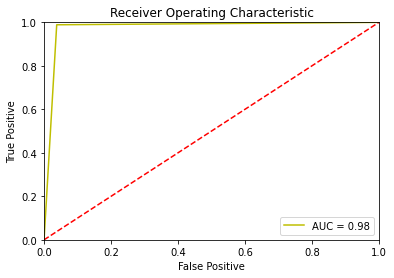

In [90]:
y_pred = g_bc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

K-Nearest Neighbour

In [91]:
from sklearn.neighbors import KNeighborsClassifier
k_nc=KNeighborsClassifier(n_neighbors = 2)  # k = 2
k_nc.fit(X_train, y_train)
y_pred = k_nc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9230769230769231


In [92]:
k_nc=KNeighborsClassifier(n_neighbors = 4)  # k = 4
k_nc.fit(X_train, y_train)
y_pred = k_nc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951


In [93]:
k_nc=KNeighborsClassifier(n_neighbors = 6)  # k = 6
k_nc.fit(X_train, y_train)
y_pred = k_nc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951
